# Flood Prediction using Support Vector Regressor
The dataset contains multiple features relevant to flood prediction, including environmental factors and socio-economic indicators. The Dataset has 50000 rows and 21 columns.
Link to Dataset is [Flood Prediction Dataset ](https://www.kaggle.com/datasets/naiyakhalid/flood-prediction-dataset)

# Techniques
### **1**. **Support Vector Regressor**
### **2**. **Decision Tree  Regressor**




## Step 1.Loading Dataset and Importing Libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


### loading dataset

In [2]:
df=pd.read_csv("/kaggle/input/flood-prediction-dataset/flood.csv")
df.head(5)  #viewing first 5 rows 

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


## Step 2.Pre-processsing the dataset

**To Get Quick Summary about dataset .To find**
> 1. data types
> 2. any missing values


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [4]:
df.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,4.991480,4.984100,5.01594,5.008480,4.989060,4.988340,5.01536,4.988600,5.006120,5.006380,...,5.006060,4.999920,4.984220,4.97982,4.988200,4.984980,5.00512,4.994360,4.990520,0.499660
std,2.236834,2.246488,2.23131,2.222743,2.243159,2.226761,2.24500,2.232642,2.234588,2.241633,...,2.238107,2.247101,2.227741,2.23219,2.231134,2.238279,2.23176,2.230011,2.246075,0.050034
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.285000
25%,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.000000,0.465000
50%,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,0.500000
75%,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.00000,6.000000,6.000000,0.535000
max,16.000000,18.000000,16.00000,17.000000,17.000000,17.000000,16.00000,16.000000,16.000000,18.000000,...,17.000000,17.000000,16.000000,16.00000,17.000000,19.000000,22.00000,16.000000,16.000000,0.725000


In [5]:
df.drop_duplicates(inplace=True)

**Visualizing Data**

<function matplotlib.pyplot.show(close=None, block=None)>

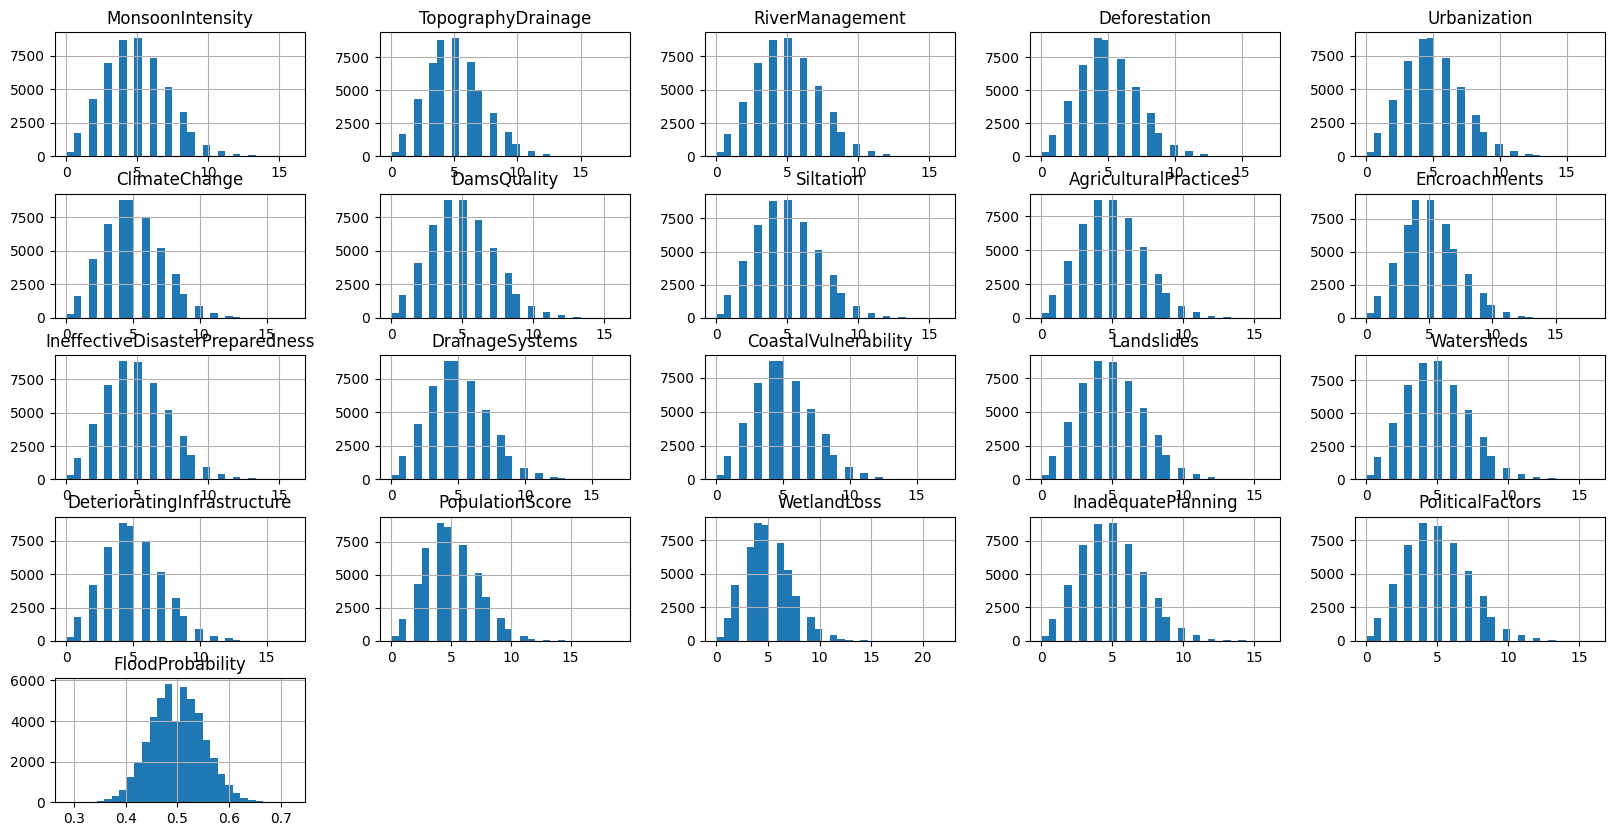

In [6]:
# Visualize the distribution of each feature
df.hist(bins=30,figsize=(20,10))
plt.show

## Step 3.Seperating Target variable and features

In [7]:
# pre-process the dtaa
x=df.drop('FloodProbability',axis=1)
y=df['FloodProbability']

**Scaling the Data**

In [8]:
from sklearn.preprocessing import StandardScaler
#----scale the feature
scaler=StandardScaler()
x_scale=scaler.fit_transform(x)

## Step 4.Spliting into training set and testing set

In [9]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.2, random_state=42)


## Step 5a).Traning the Model - Support Vector Regressor

In [10]:
# Train the Model
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
svr_model = SVR(kernel='rbf')  # You can experiment with different kernels
svr_model.fit(x_train, y_train)

SVR()

## Step 6a).Evaluating Model

In [11]:
# Evaluate the Model
y_pred = svr_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.0006984723204456066
R-squared: 0.7195549993818169


## Step 7a).Visualizing the Model

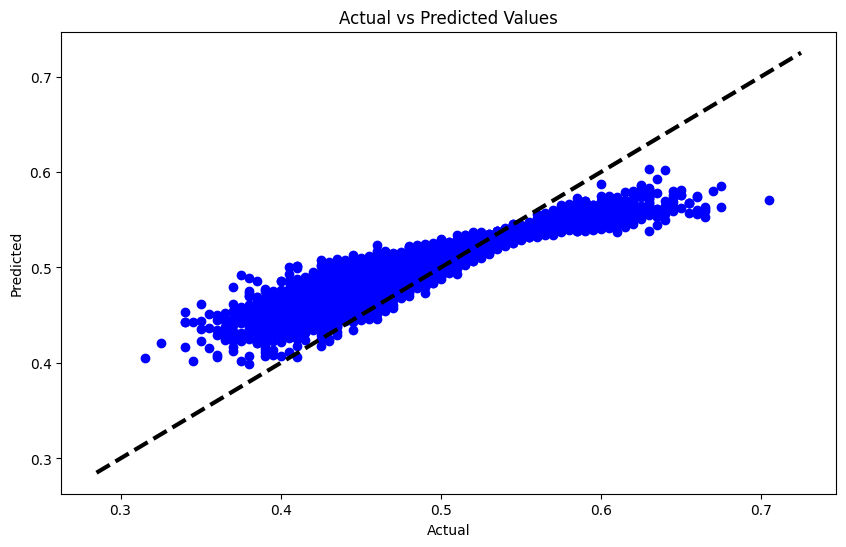

In [12]:
# Visualize the Results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

## Step 5b).Traning the Model - Decision Tree Regressor

In [13]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)


DecisionTreeRegressor(random_state=42)

## Step 6b).Evaluating Model

In [14]:
# Make predictions on the test data
y_pred_dt = dt_model.predict(x_test)

# Calculate and print regression metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Mean Squared Error (Decision Tree): {mse_dt}')
print(f'R-squared (Decision Tree): {r2_dt}')


Mean Squared Error (Decision Tree): 0.0022153925000000002
R-squared (Decision Tree): 0.11049338270749498


## Step 7b).Visualizing the Model

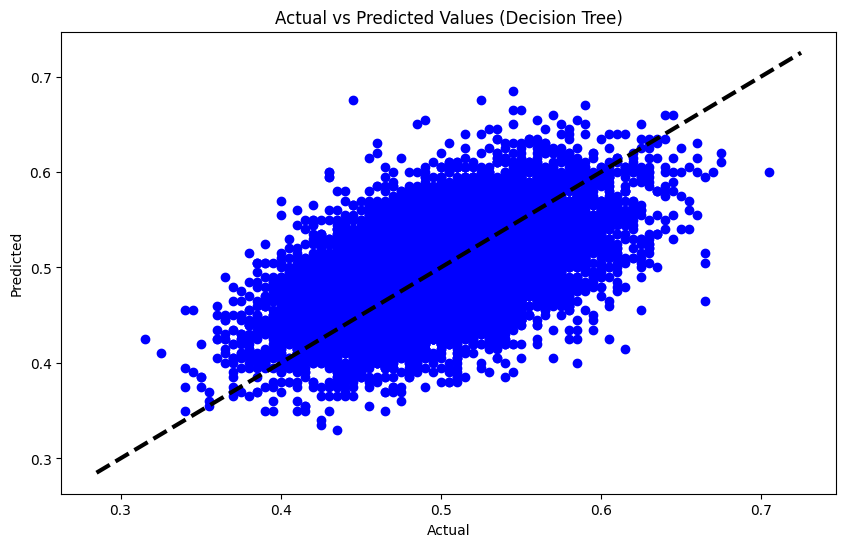

In [15]:
# Plot predicted vs actual values for Decision Tree Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Decision Tree)')
plt.show()


## Step 8). Conclusion

A lower MSE indicates that the model's predictions are closer to the actual values. 
The **SVR has a significantly lower MSE compared to the Decision Tree Regressor**, 
indicating better performance in terms of accuracy.